In [ ]:
#### JBL

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import time
import pandas as pd
import sklearn
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("RFLFSODataFull.csv")
print(data.columns)

data.head()



Index(['FSO_Att', 'RFL_Att', 'AbsoluteHumidity', 'AbsoluteHumidityMax',
       'AbsoluteHumidityMin', 'Distance', 'Frequency', 'Particulate',
       'ParticulateMax', 'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')


FSO_Att   RFL_Att  AbsoluteHumidity  AbsoluteHumidityMax  \
0  8.254577  7.600193         18.472646            19.075507   
1  9.322295  5.411397         18.478785            19.611820   
2  7.964782  6.700351         16.885113            18.536742   
3  7.906317  4.780415         17.990723            19.505412   
4  8.075273  7.085838         18.034877            18.517099   

   AbsoluteHumidityMin     Distance    Frequency  Particulate  ParticulateMax  \
0            17.508664  2118.886405  83500000000          0.0             0.0   
1            16.896667  2120.624796  73500000000          0.0             0.0   
2            15.665812  2116.668065  83500000000          0.0             0.0   
3            16.920888  2115.999242  73500000000          0.0             0.0   
4            16.658465  2119.347689  83500000000          0.0             0.0   

   ParticulateMin  ...  TemperatureMax  TemperatureMin  Time   Visibility  \
0             0.0  ...       24.122785       21.196399     0  23034.56952   
1             0.0  ...       22.785643       20.543135     0  17165.82555   
2             0.0  ...       26.358728       22.813039     0  51252.03258   
3             0.0  ...       25.552325       22.422736     0  27761.42258   
4             0.0  ...       25.912297       22.742591     0  21479.38074   

   VisibilityMax  VisibilityMin  WindDirection  WindSpeed  WindSpeedMax  \
0    23372.20951    21272.38193      49.620263   0.265940      0.634868   
1    18837.86592    16343.07908      95.341487   0.337352      1.499680   
2    54265.16333    50598.65827      56.090370   2.060910      4.029882   
3    29700.69182    27616.15699      41.316137   0.360863      0.840824   
4    22366.14234    21135.60312      63.251972   0.965850      1.981563   

   WindSpeedMin  
0      0.239714  
1      0.330869  
2      1.946404  
3      0.359230  
4      0.902008  

[5 rows x 27 columns]

In [ ]:
print("Checking for the shape of the data :", data.shape)
print("\nChecking for total number of NAN entries:", np.sum(data.isna()))
print("\nChecking for total number of duplicated entries:", np.sum(data.duplicated().sum()))

data.info()
print()
data.describe()


summary_data = data.describe()
print("Summary of the dataset:\n", summary_data)



Checking for the shape of the data : (91379, 27)

Checking for total number of NAN entries: FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64

Checking for total number of duplicated entries: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Summary of the dataset:
             FSO_Att       RFL_Att  AbsoluteHumidity  AbsoluteHumidityMax  \
count  91379.000000  91379.000000      91379.000000         91379.000000   
mean       6.769458     11.619098          9.553919            10.032760   
std        3.903843      3.438873          5.858577             6.162798   
min        0.788363      0.027142          1.141556             1.238270   
25%        3.473063     10.829331          4.958993             5.205861   
50%        6.336167     11.856560          6.870737             7.205499   
75%        8.664984     12.847944         14.049470            14.782679   
max       32.455222     46.893150         24.790883            26.407305   

       AbsoluteHumidityMin      Distance     Frequency   Particulate  \
count         91379.000000  91379.000000  9.137900e+04  91379.000000   
mean              9.076251   3297.930328  7.850005e+10     27.065979   
std               5.575927   1224.305893  5.000027e+09     72.134023   
mi

# HISTOGRAMS FOR ALL COLUMNS

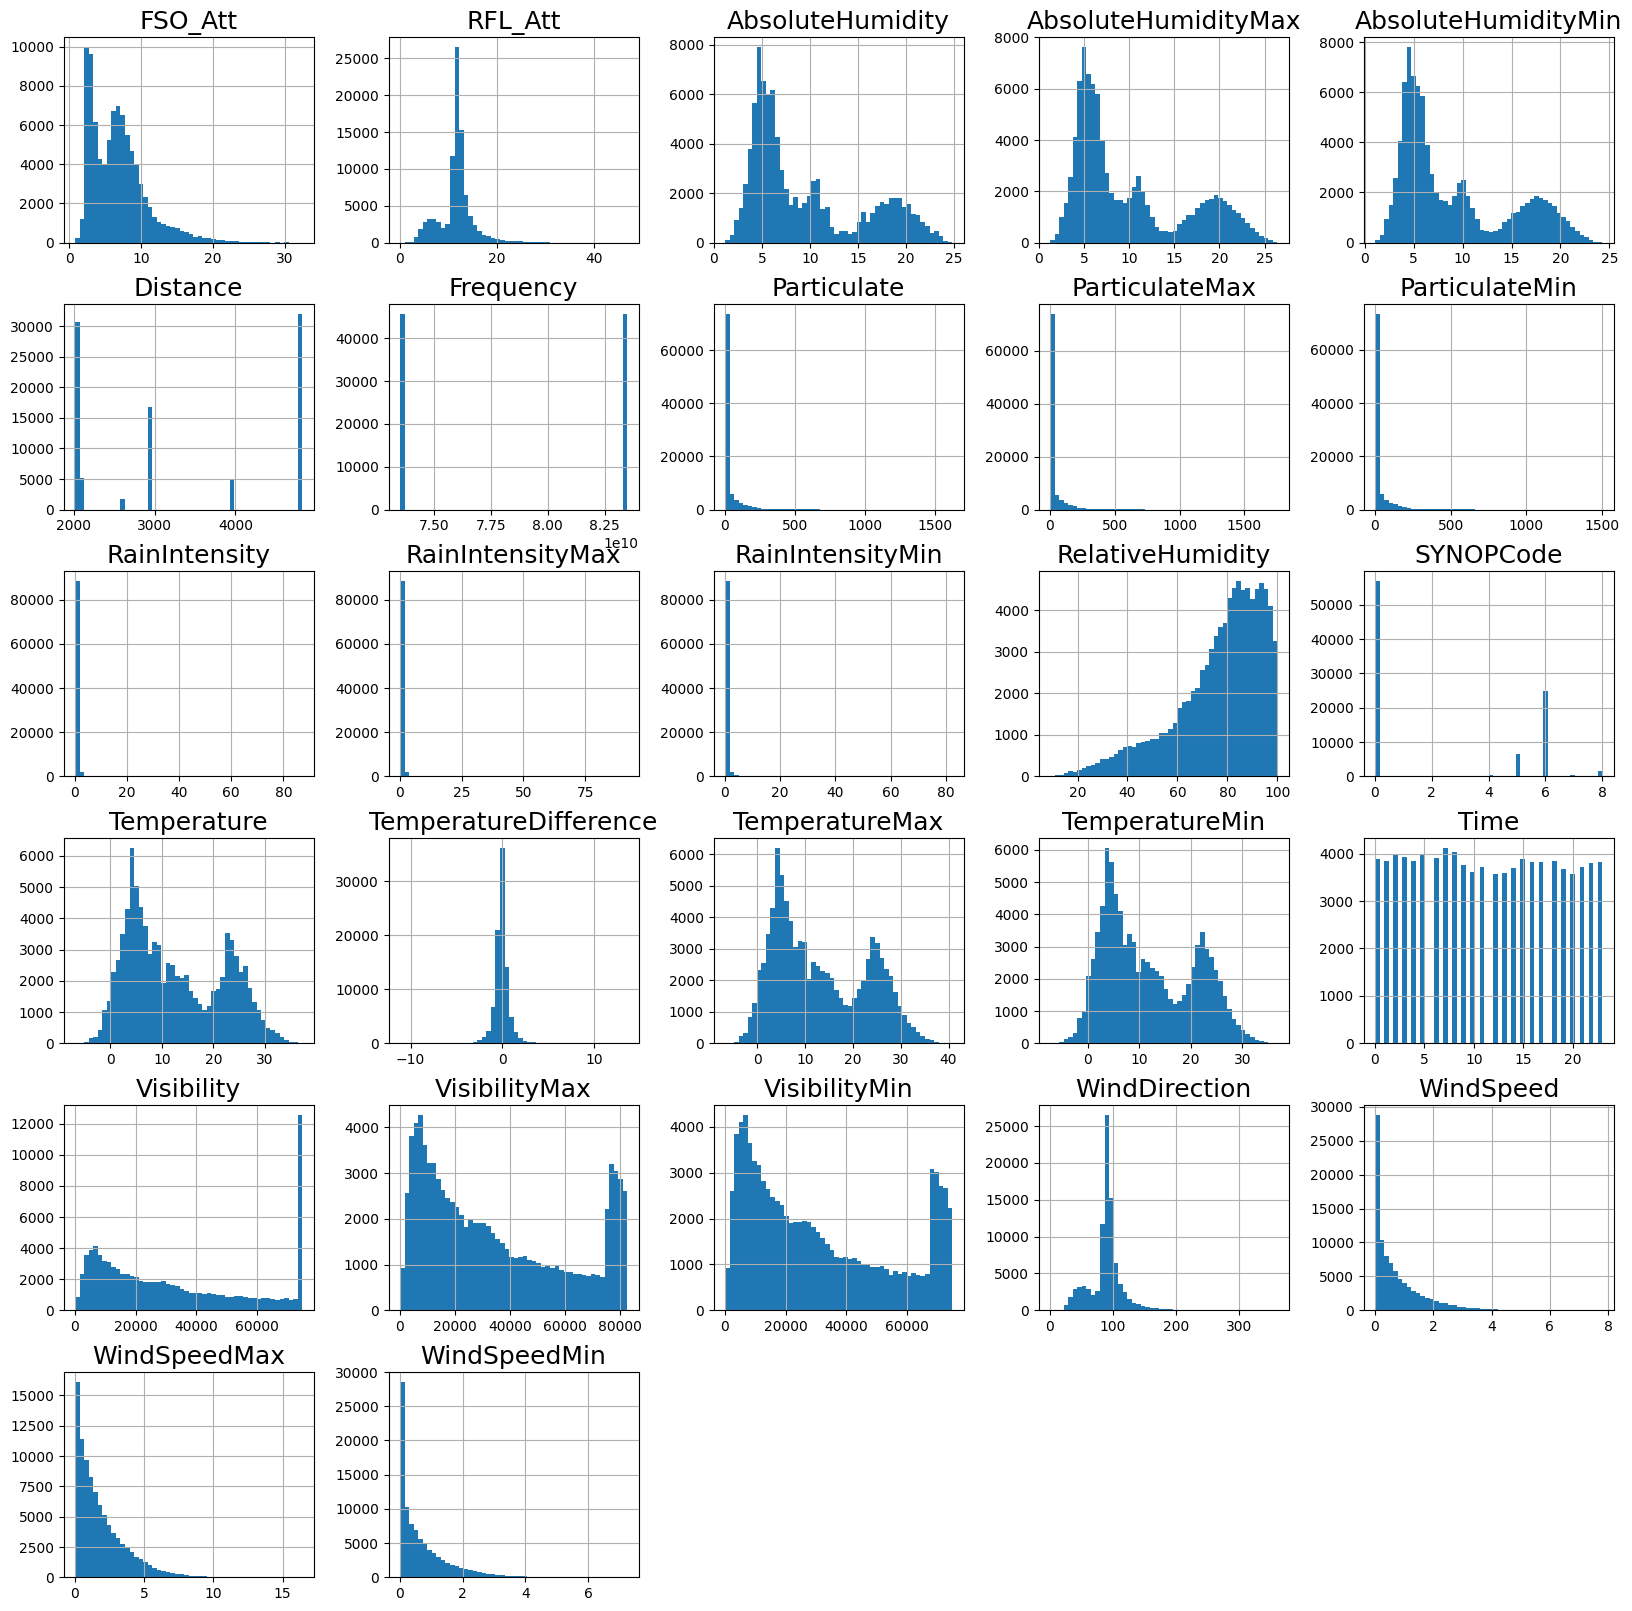

In [ ]:
plot_axes = data.hist(bins=50, figsize=(20, 20))

for ax in plot_axes.flatten():
    ax.title.set_fontsize(18)

plt.show()


# Target Variables Analysis


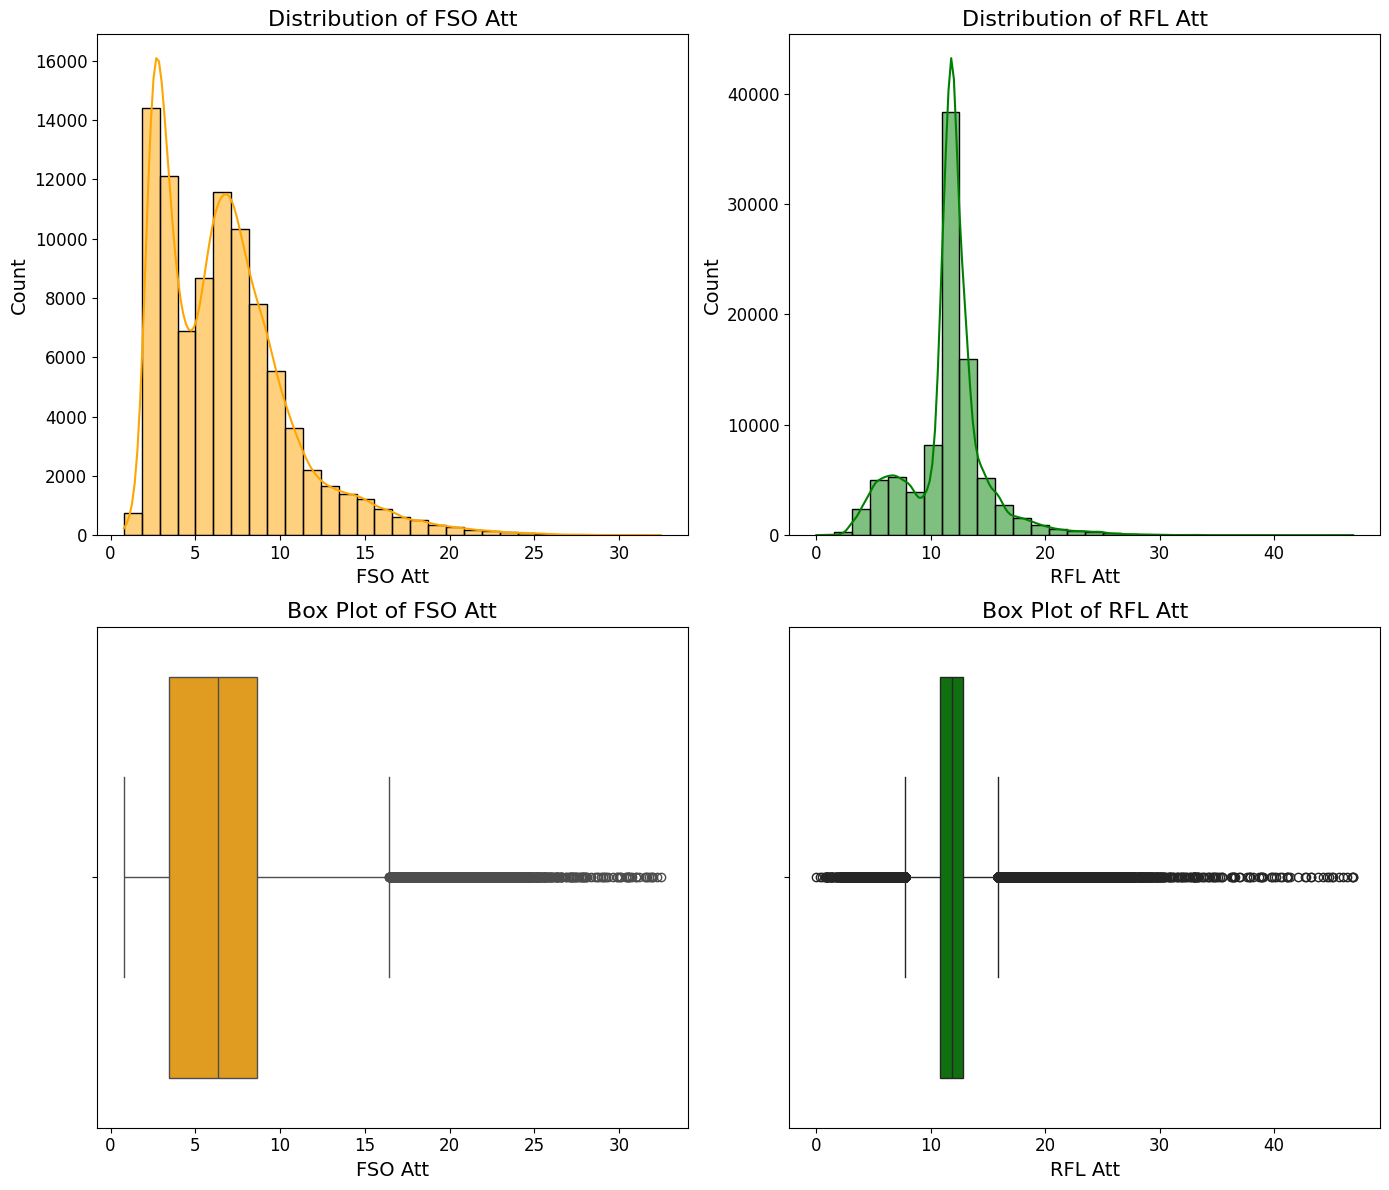

In [ ]:
plt.figure(figsize=(14, 12))

# histogram for FSO Att nn RF Att
plt.subplot(2, 2, 1)
sns.histplot(data['FSO_Att'], kde=True, bins=30, color='orange')
plt.title('Distribution of FSO Att', fontsize=16)
plt.xlabel('FSO Att', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', labelsize=12)


plt.subplot(2, 2, 2)
sns.histplot(data['RFL_Att'], kde=True, bins=30, color='green')
plt.title('Distribution of RFL Att', fontsize=16)
plt.xlabel('RFL Att', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

# boox plot for FSO Att nn or RF Att
plt.subplot(2, 2, 3)
sns.boxplot(x=data['FSO_Att'], color='orange')
plt.title('Box Plot of FSO Att', fontsize=16)
plt.xlabel('FSO Att', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

plt.subplot(2, 2, 4)
sns.boxplot(x=data['RFL_Att'], color='green')
plt.title('Box Plot of RFL Att', fontsize=16)
plt.xlabel('RFL Att', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()


# Target vs. Categorical Variables

<ipython-input-19-ec556235ade8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='SYNOPCode', y='FSO_Att', ax=axes[0, 0], palette=col_SYNOP_palatte)
<ipython-input-19-ec556235ade8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='SYNOPCode', y='RFL_Att', ax=axes[0, 1], palette=col_SYNOP_palatte)
<ipython-input-19-ec556235ade8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Time', y='FSO_Att', ax=axes[1, 0], palette=time_palatte)
<ipython-input-19-ec556235ade8>:26: FutureWarning: 

Passing `palett

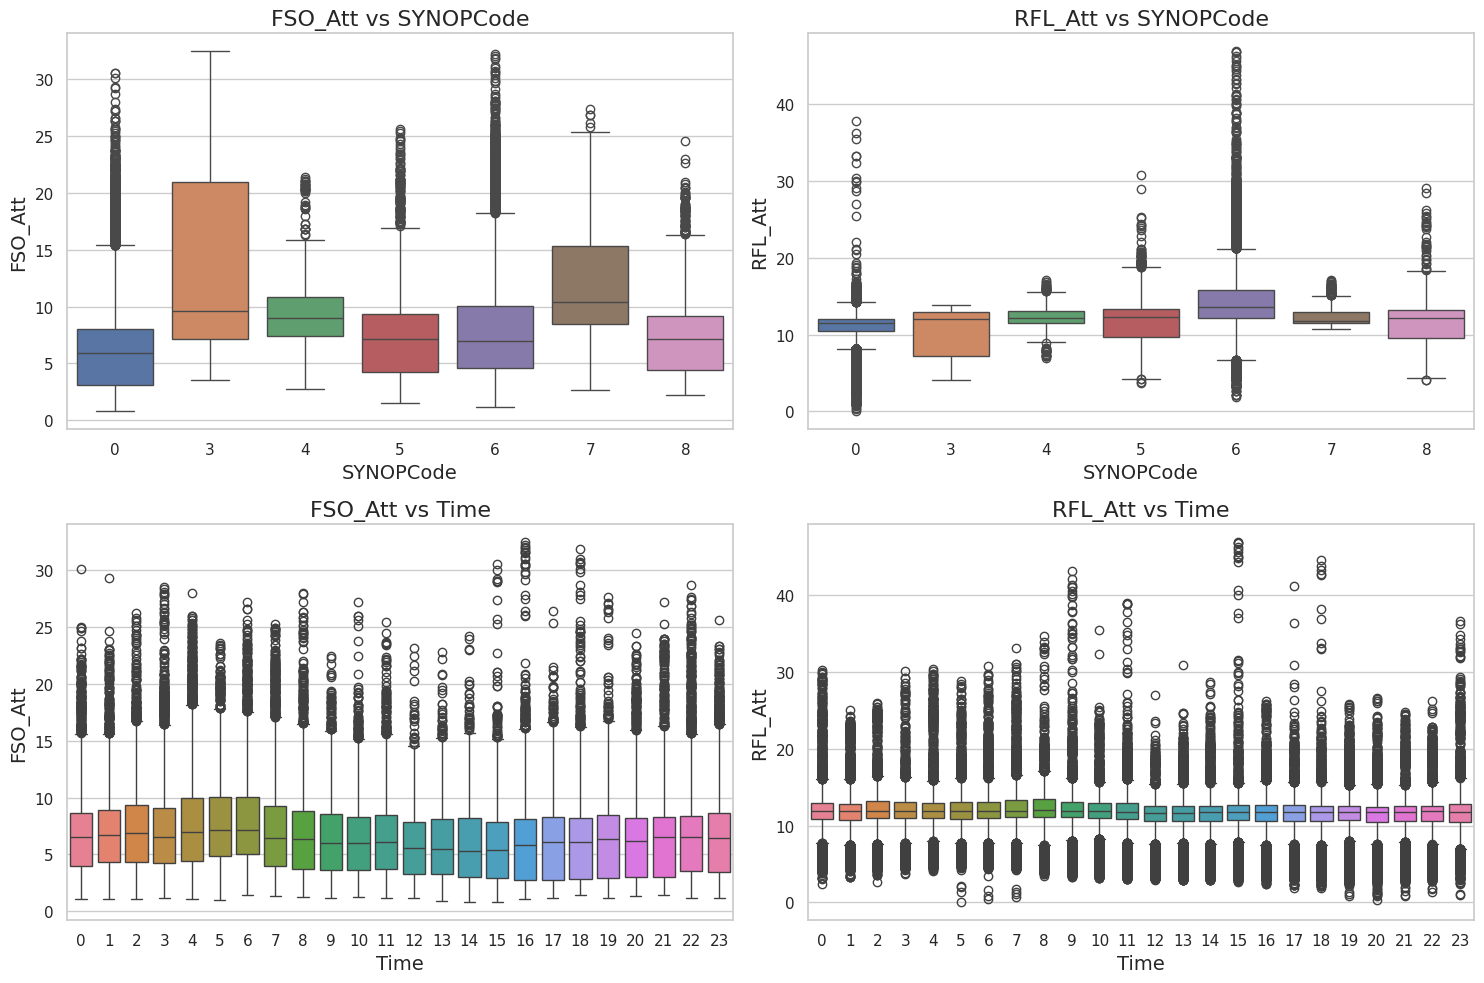

In [ ]:
sns.set(style="whitegrid")
data = data.sort_values(by=['SYNOPCode', 'Time'])

col_SYNOP_palatte = sns.color_palette(["#4c72b0", "#dd8452", "#55a868", "#c44e52", "#8172b2", "#937860", "#da8bc3"])
time_palatte = sns.color_palette("husl", len(data['Time'].unique()))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# FSO Att//RF Att vs SYNOPCode
sns.boxplot(data=data, x='SYNOPCode', y='FSO_Att', ax=axes[0, 0], palette=col_SYNOP_palatte)
axes[0, 0].set_title('FSO_Att vs SYNOPCode', fontsize=16)
axes[0, 0].set_xlabel('SYNOPCode', fontsize=14)
axes[0, 0].set_ylabel('FSO_Att', fontsize=14)

sns.boxplot(data=data, x='SYNOPCode', y='RFL_Att', ax=axes[0, 1], palette=col_SYNOP_palatte)
axes[0, 1].set_title('RFL_Att vs SYNOPCode', fontsize=16)
axes[0, 1].set_xlabel('SYNOPCode', fontsize=14)
axes[0, 1].set_ylabel('RFL_Att', fontsize=14)

# FSO Att//RF Att vs Time
sns.boxplot(data=data, x='Time', y='FSO_Att', ax=axes[1, 0], palette=time_palatte)
axes[1, 0].set_title('FSO_Att vs Time', fontsize=16)
axes[1, 0].set_xlabel('Time', fontsize=14)
axes[1, 0].set_ylabel('FSO_Att', fontsize=14)

sns.boxplot(data=data, x='Time', y='RFL_Att', ax=axes[1, 1], palette=time_palatte)
axes[1, 1].set_title('RFL_Att vs Time', fontsize=16)
axes[1, 1].set_xlabel('Time', fontsize=14)
axes[1, 1].set_ylabel('RFL_Att', fontsize=14)

plt.tight_layout()
plt.show()


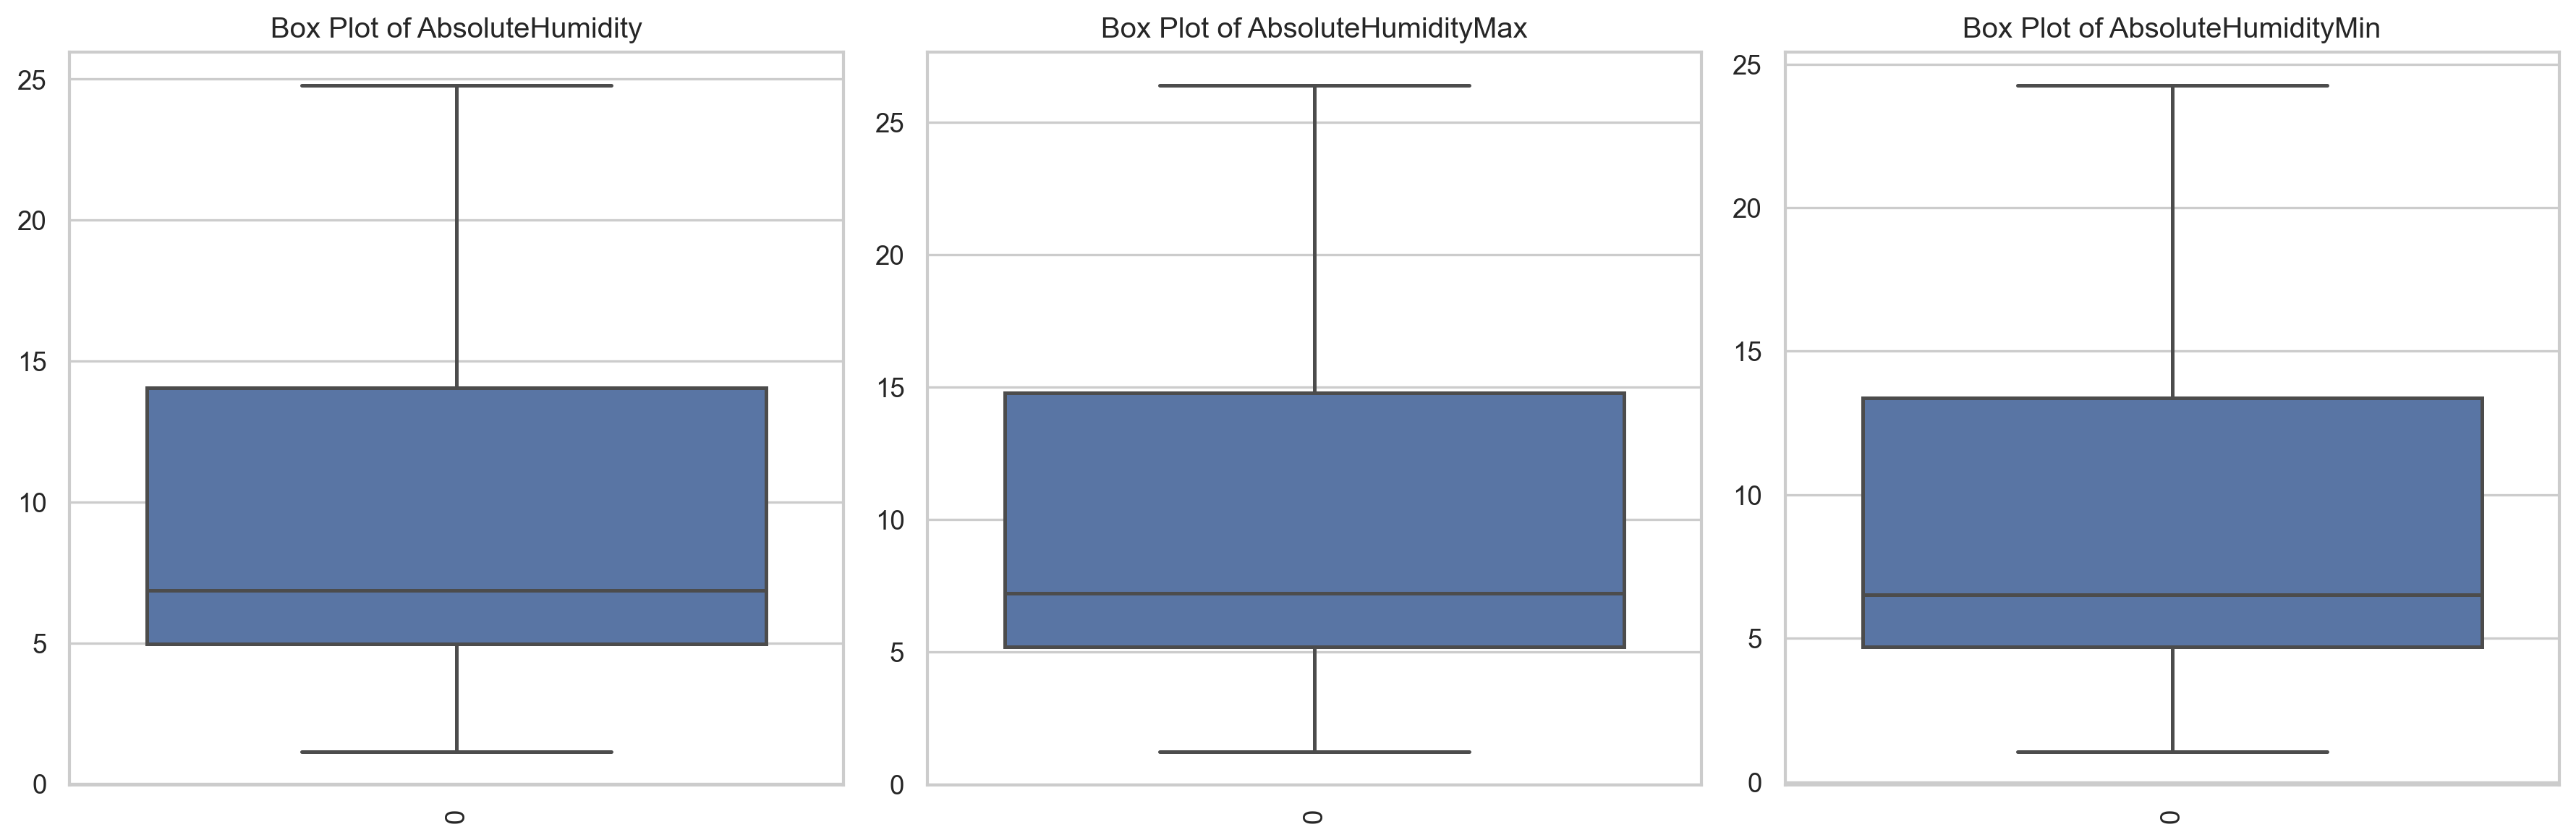

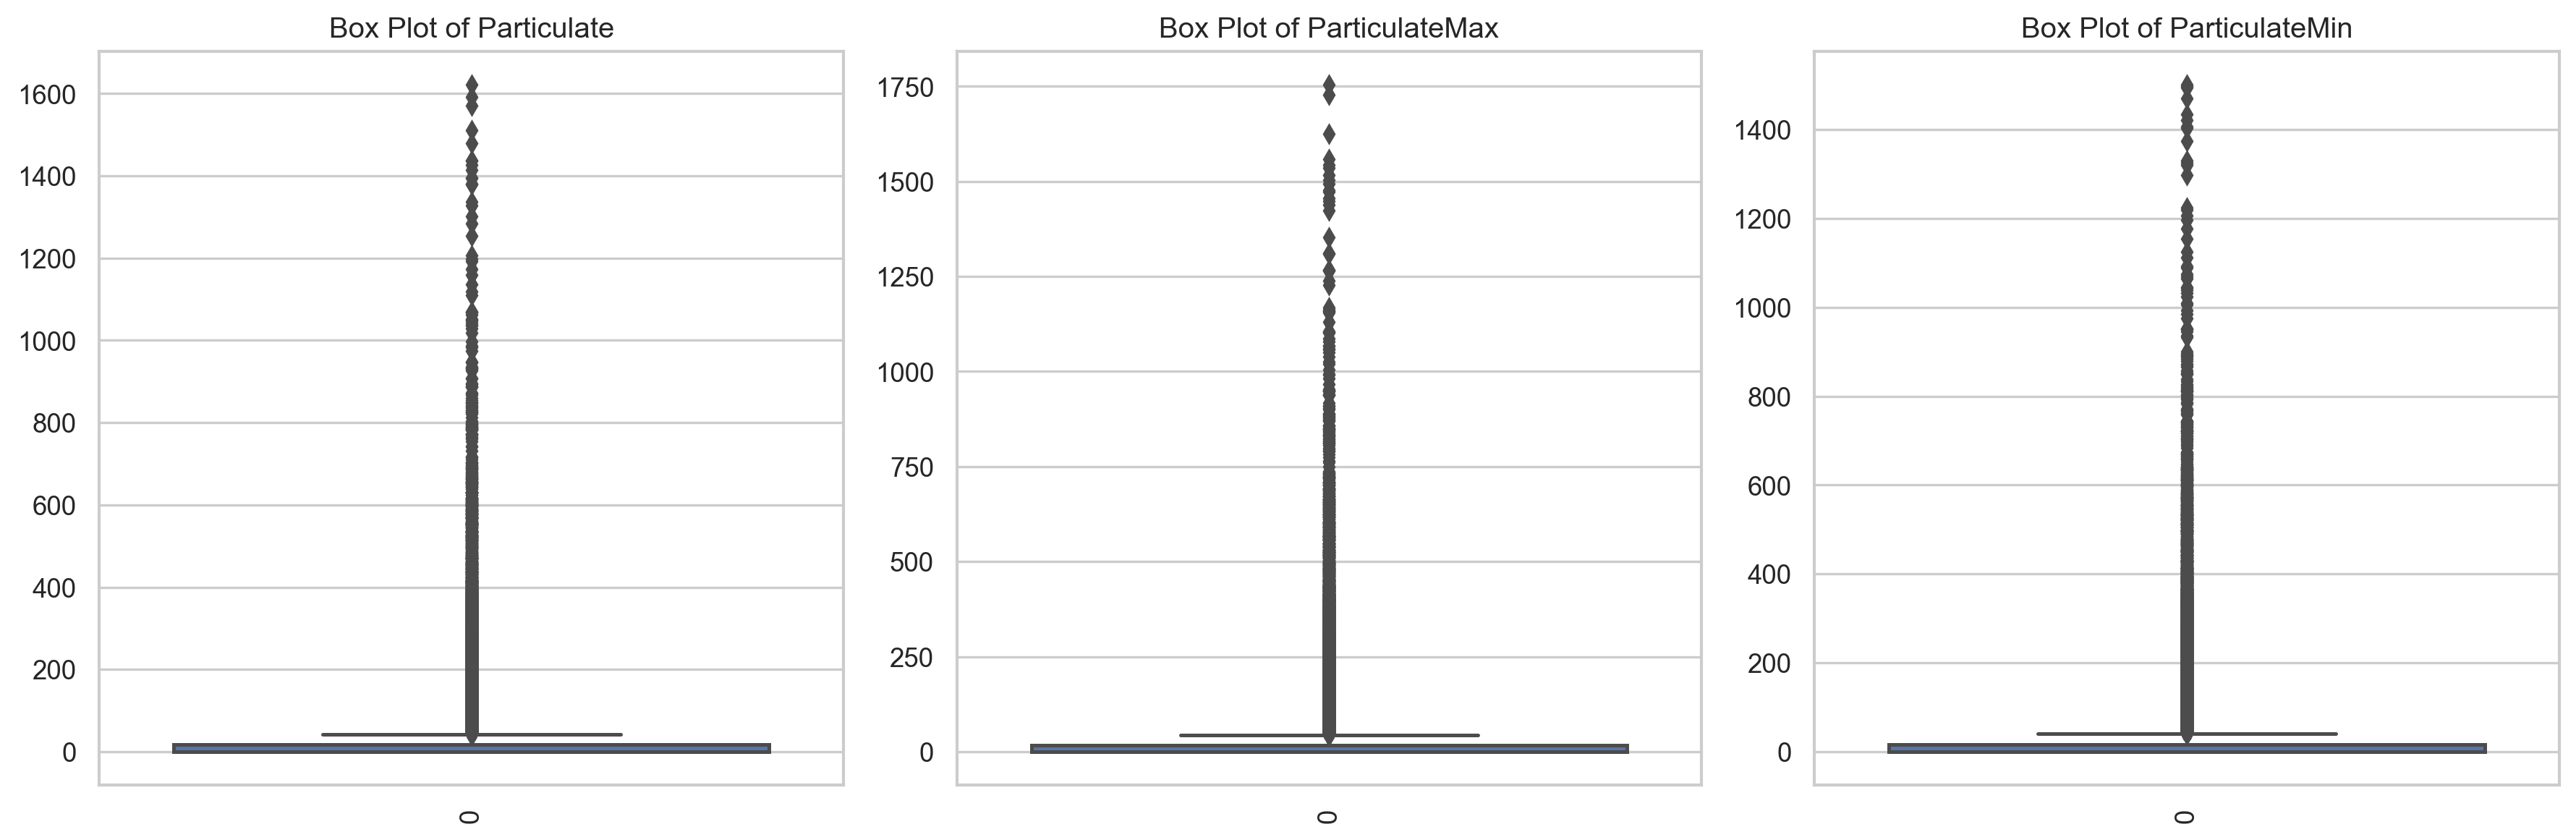

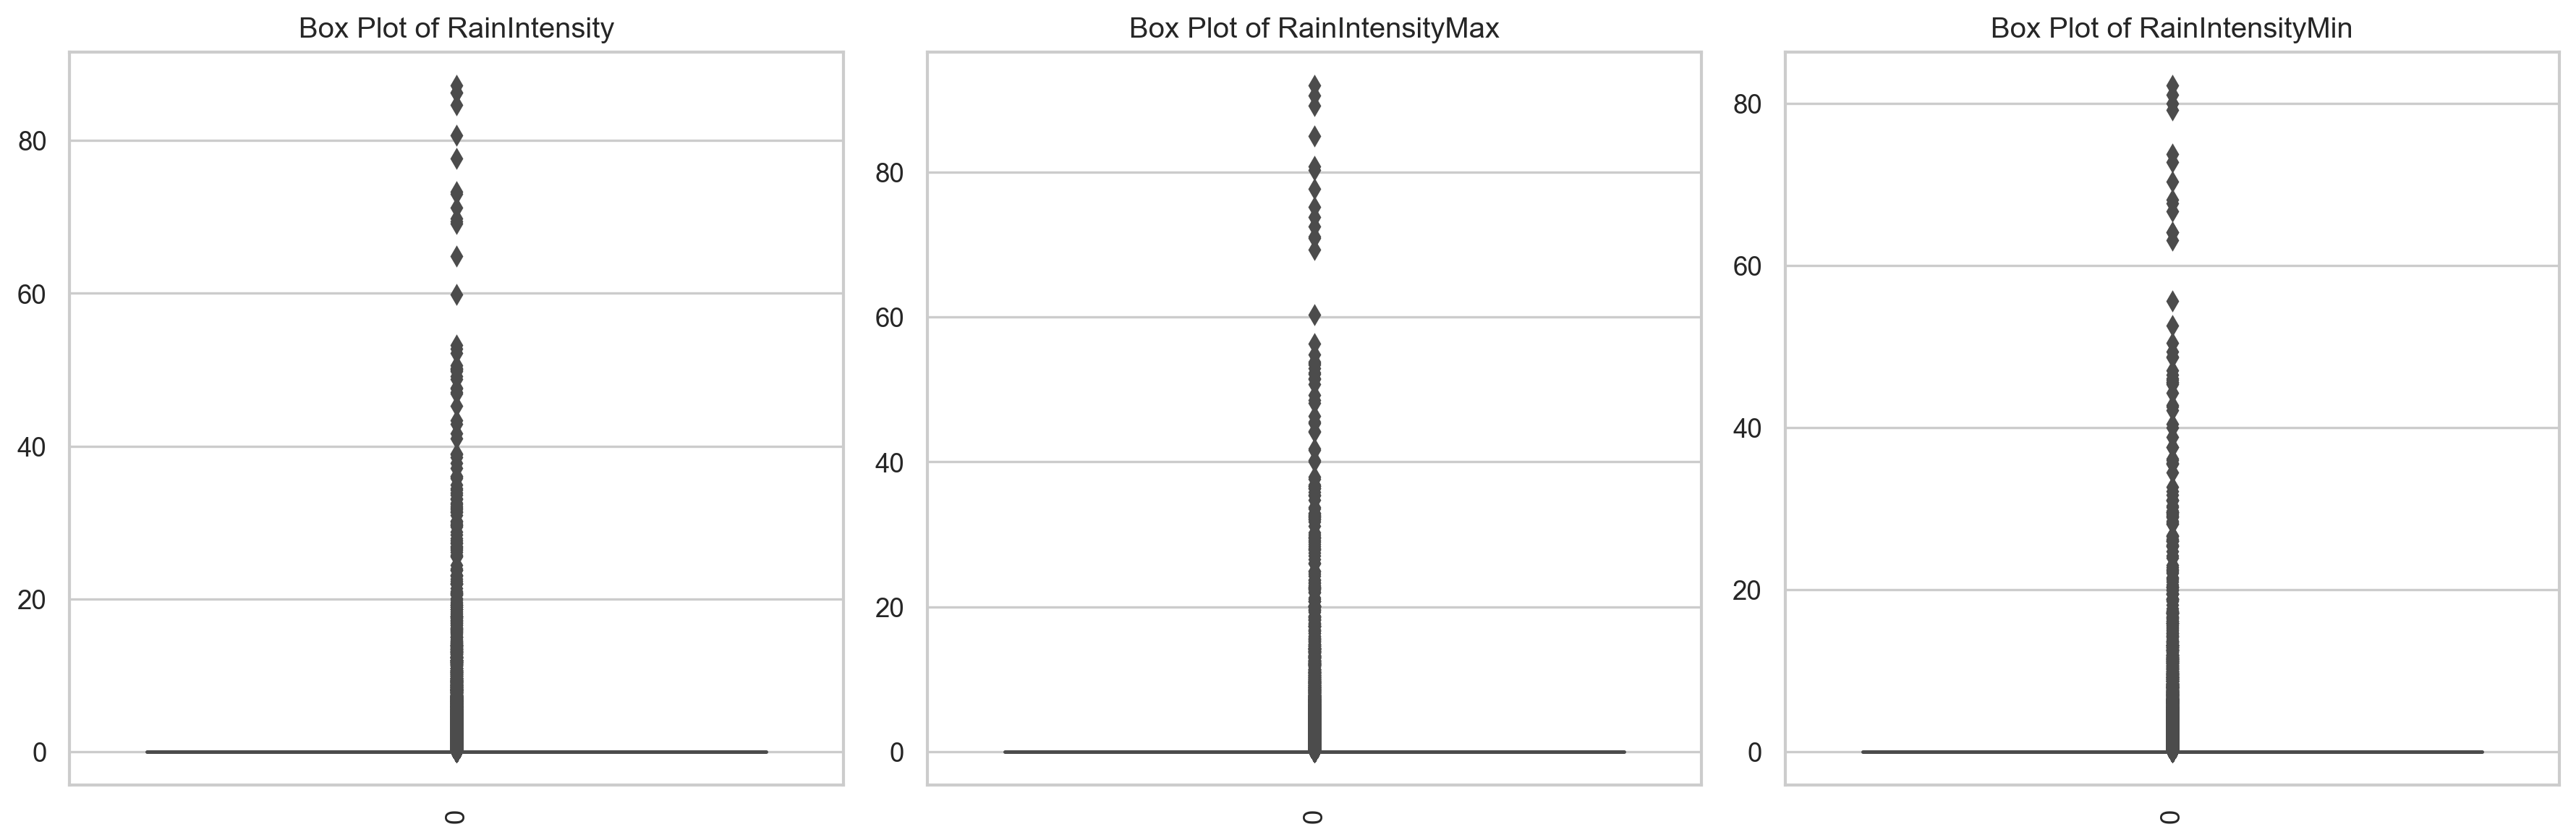

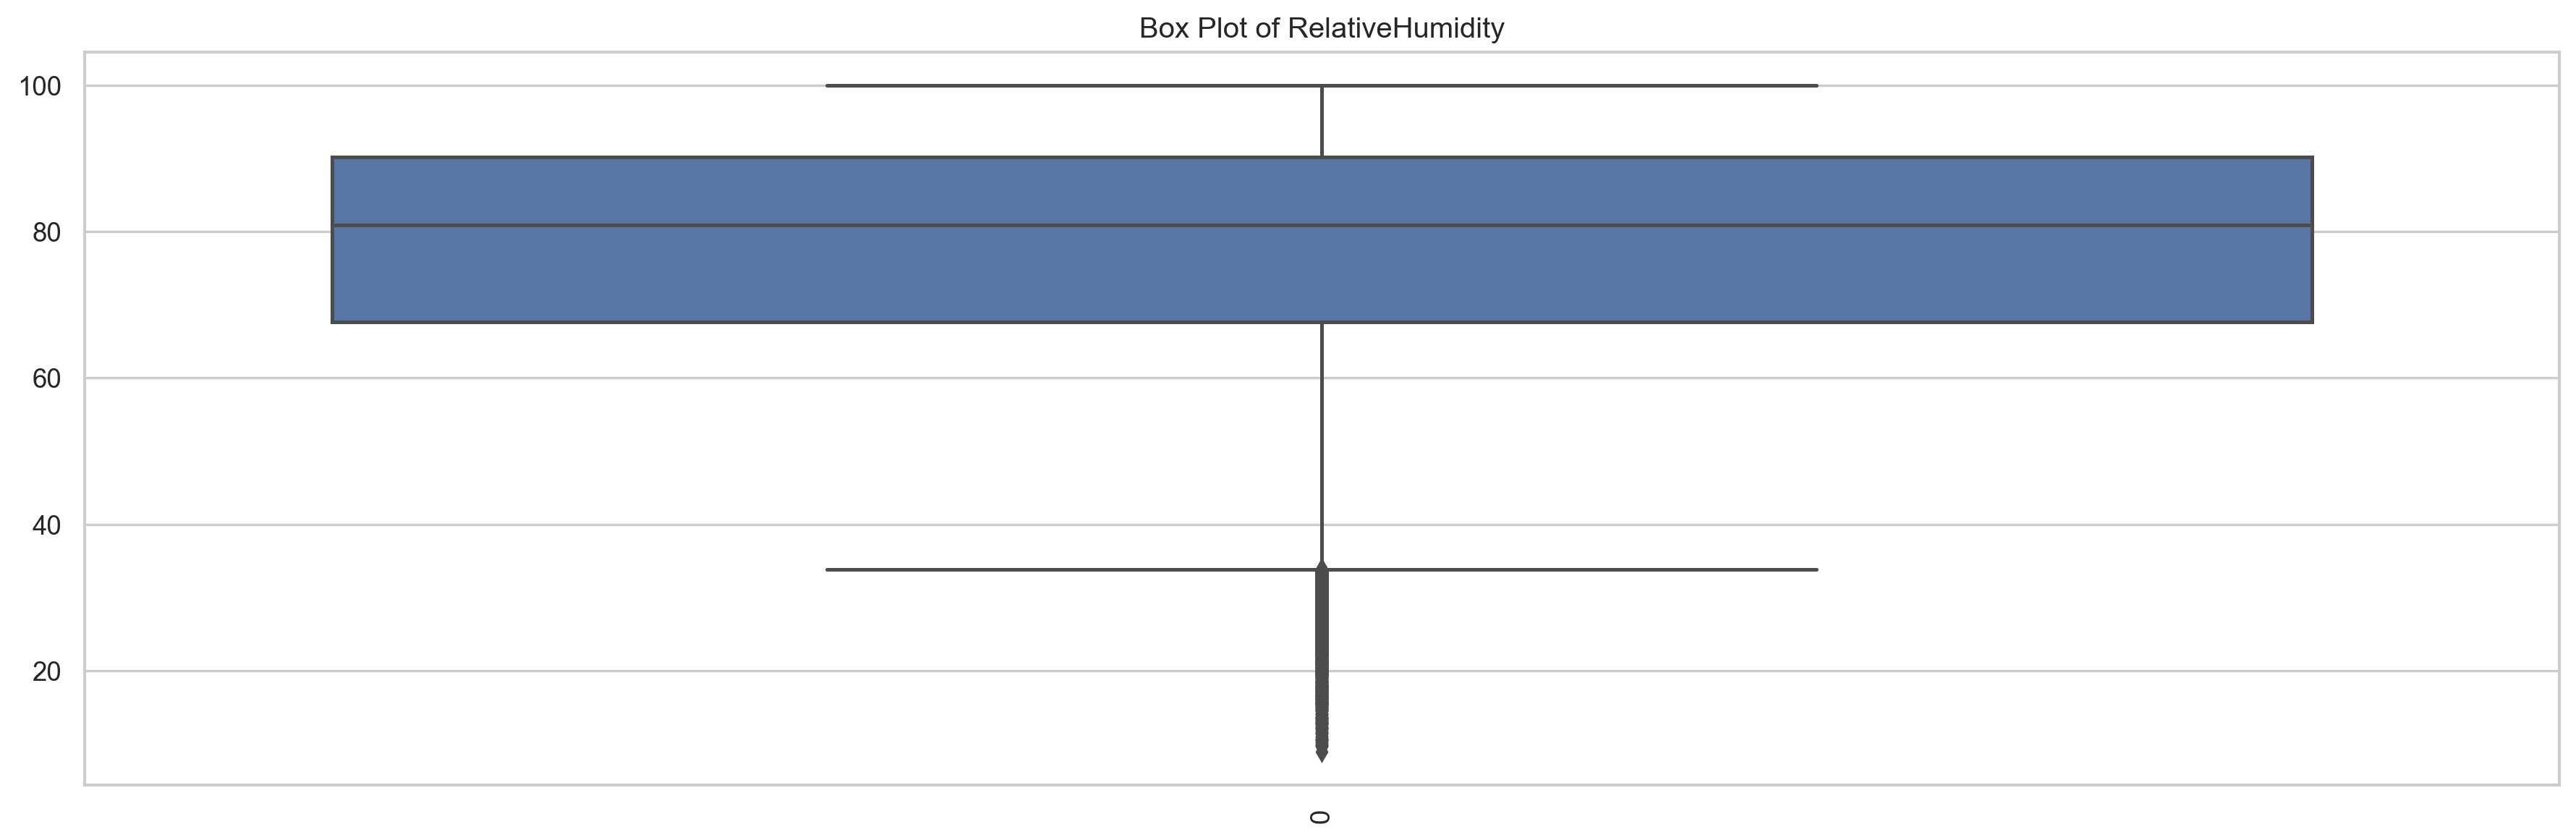

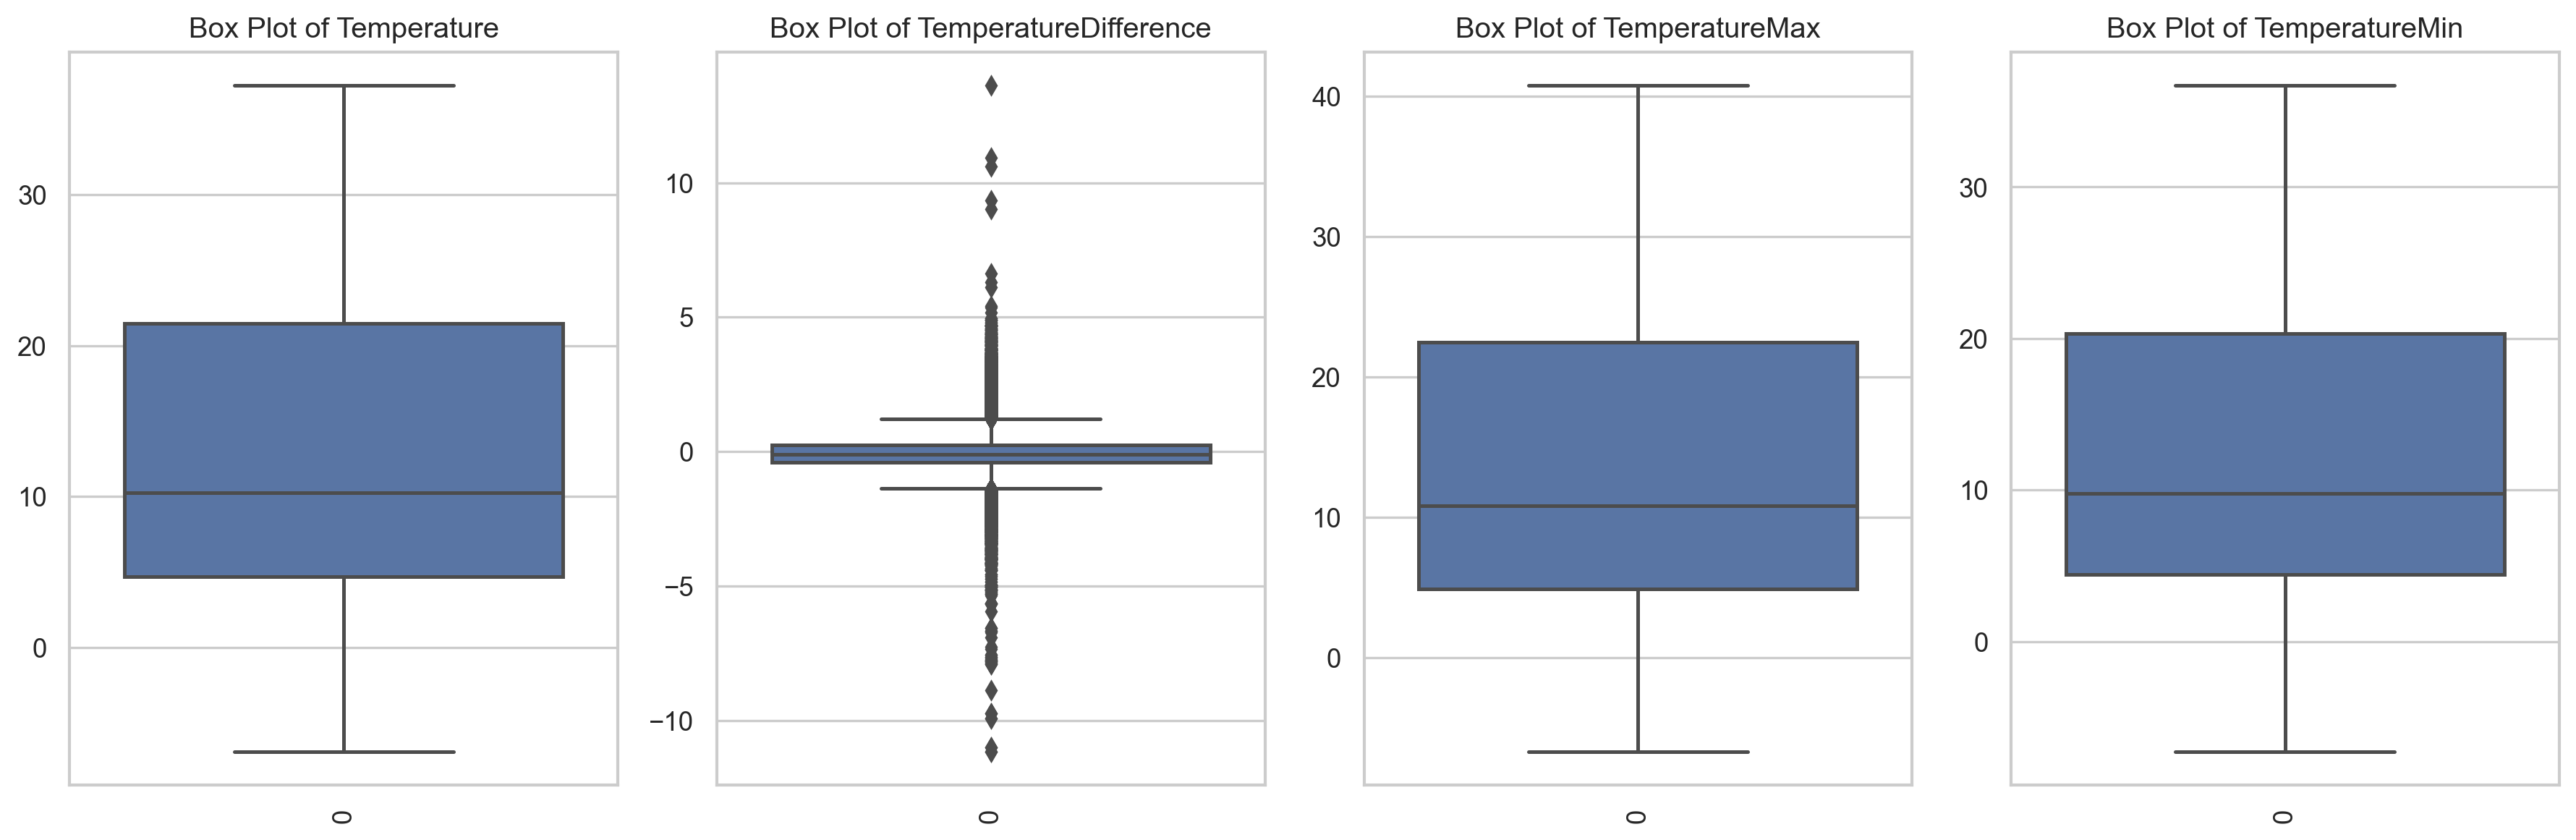

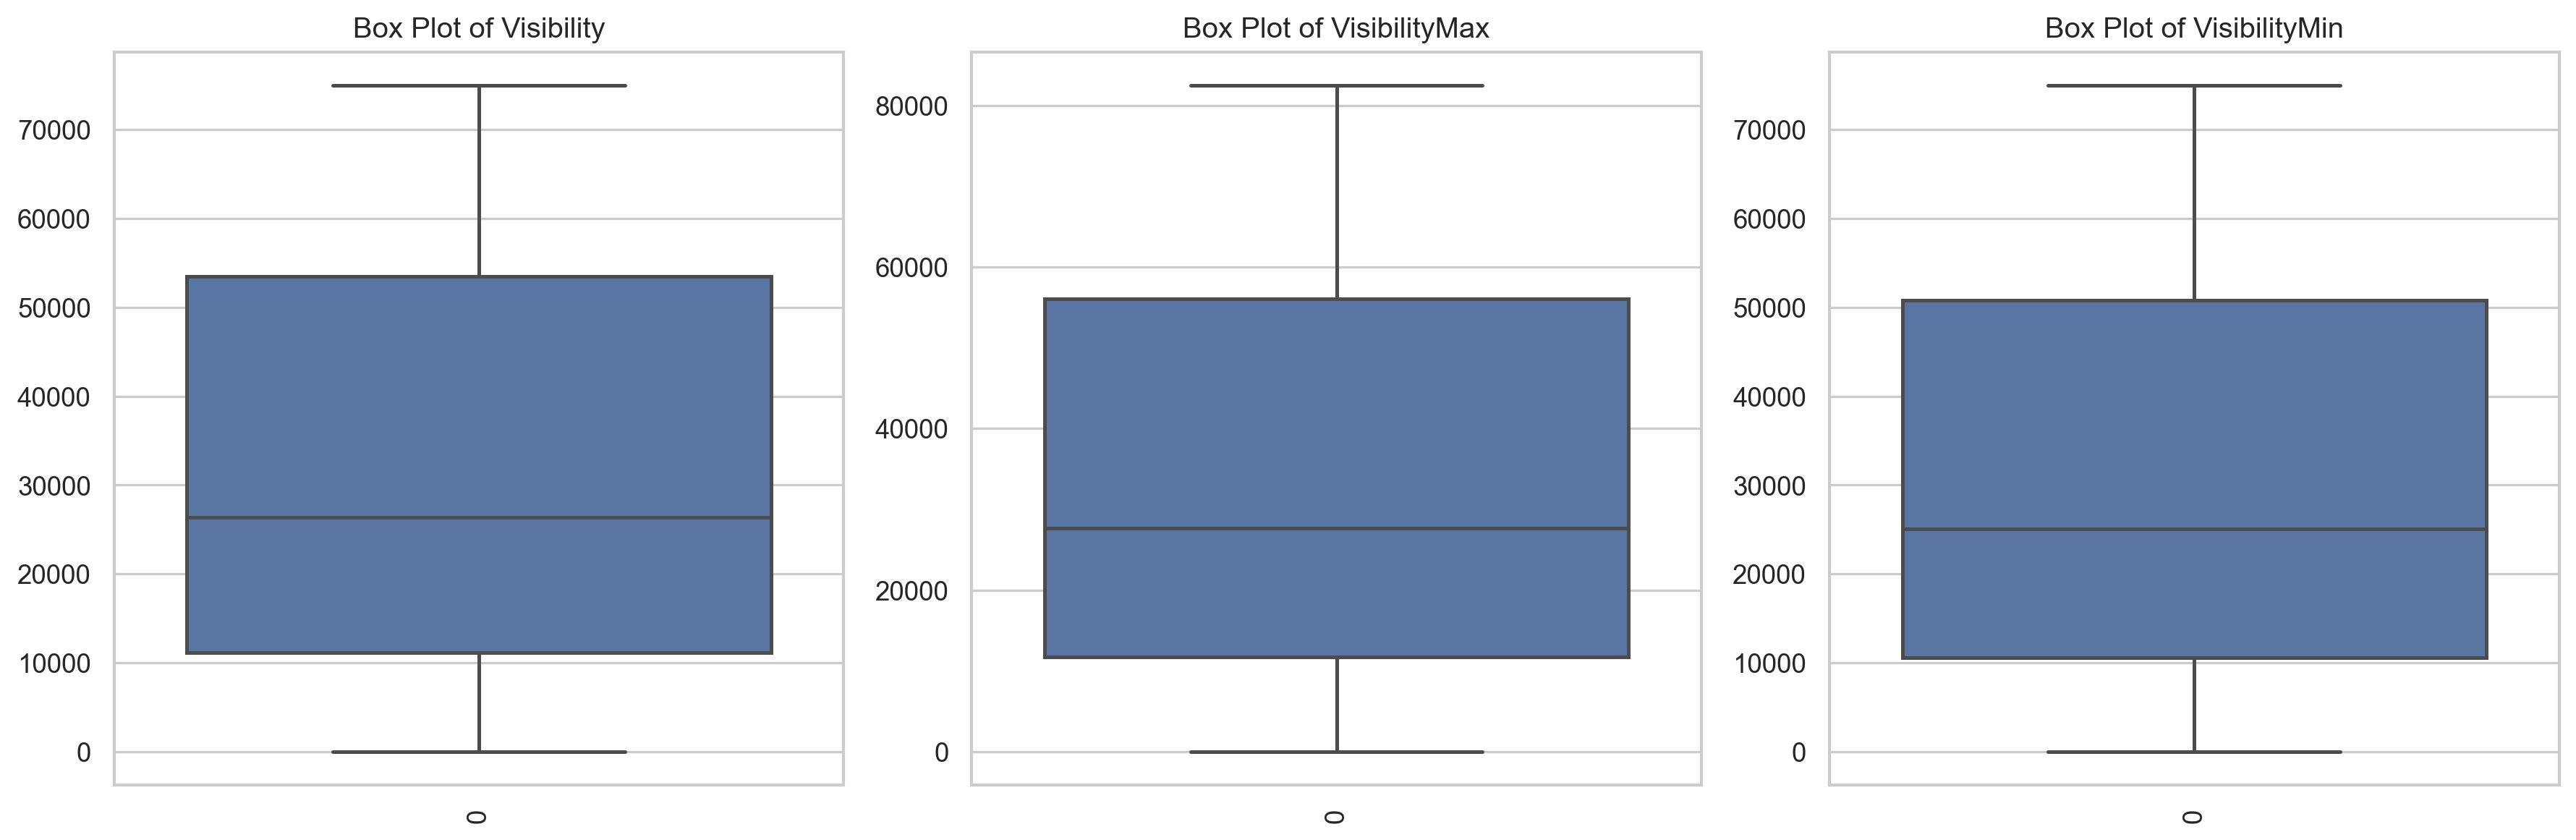

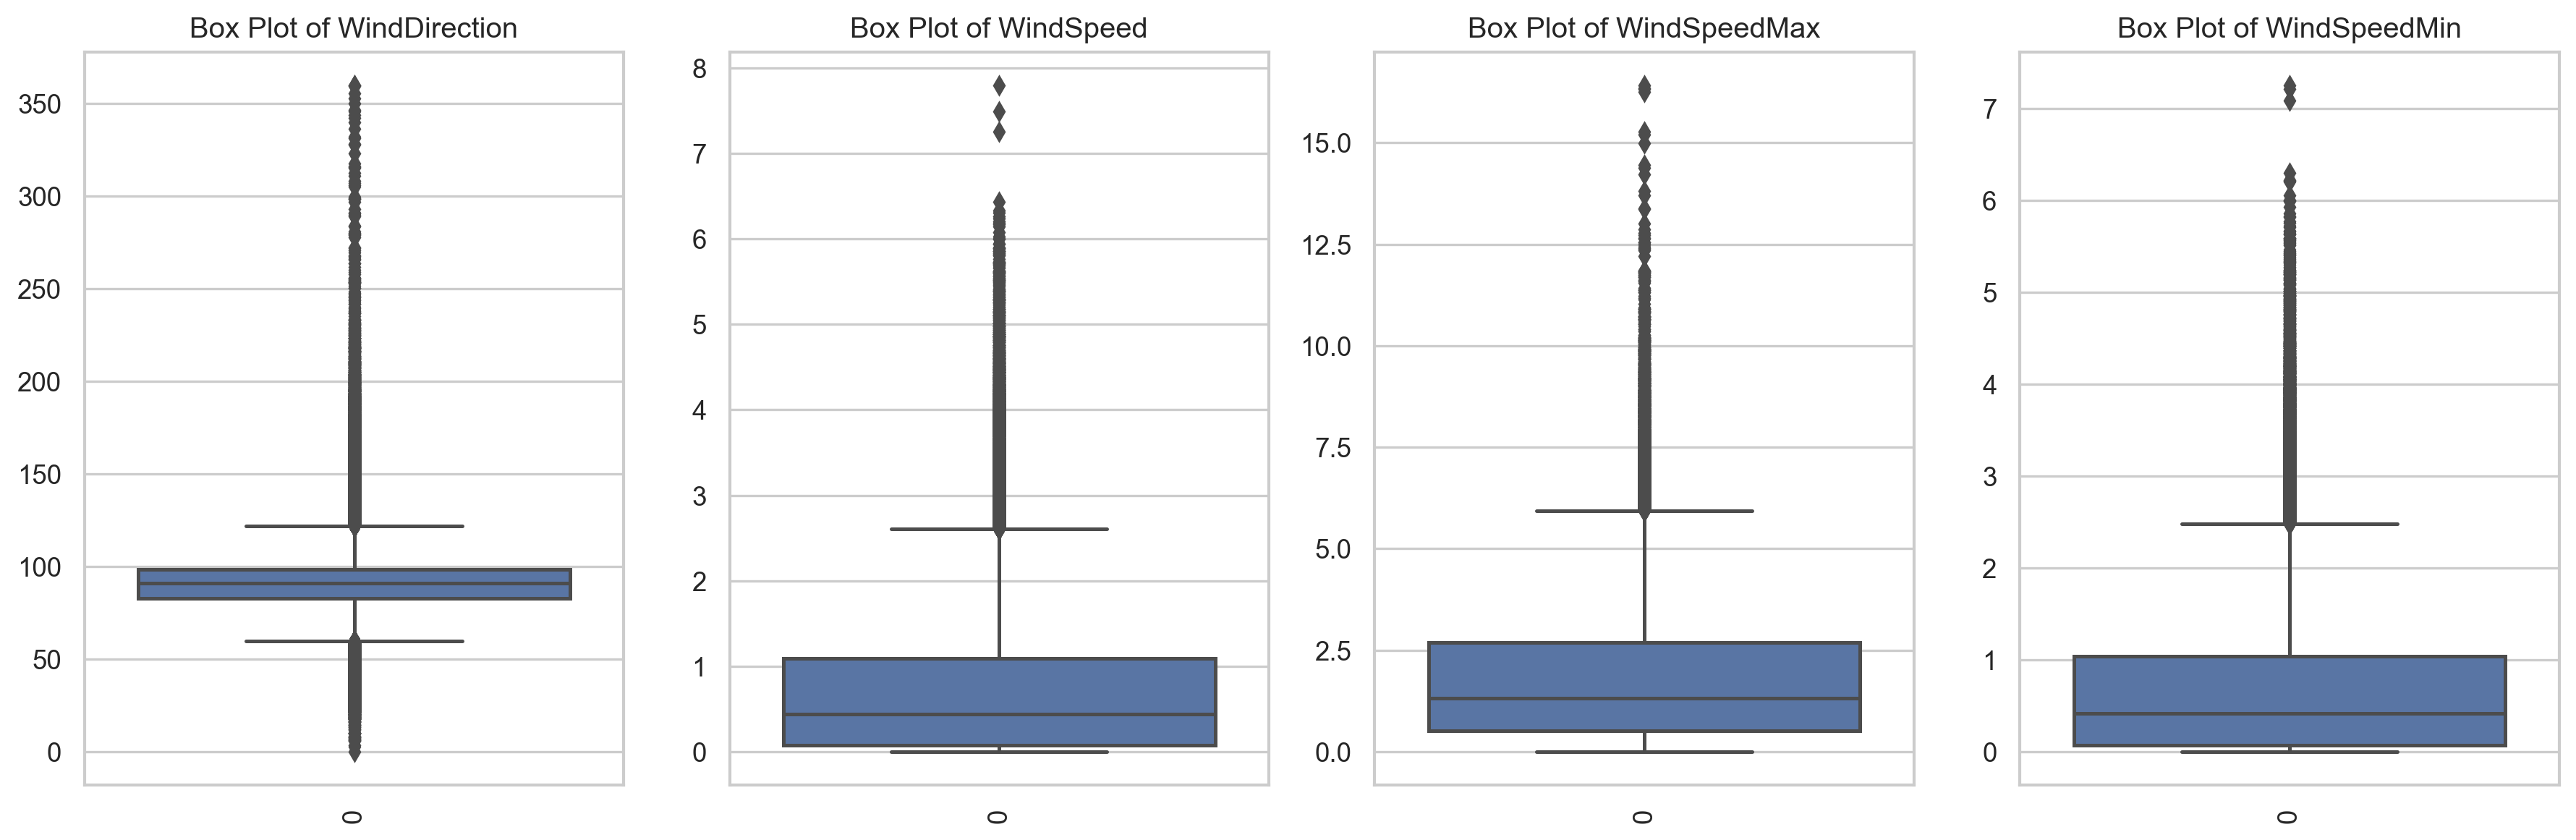

In [ ]:
feat_groups = [
    ['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin'],
    ['Particulate', 'ParticulateMax', 'ParticulateMin'],
    ['RainIntensity', 'RainIntensityMax', 'RainIntensityMin'],
    ['RelativeHumidity'],
    ['Temperature', 'TemperatureDifference', 'TemperatureMax', 'TemperatureMin'],
    ['Visibility', 'VisibilityMax', 'VisibilityMin'],
    ['WindDirection', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin']
]

for group in feat_groups:
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(group):
        plt.subplot(1, len(group), i + 1)
        sns.boxplot(data=data[feature])
        plt.title(f'Box Plot of {feature}')
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()



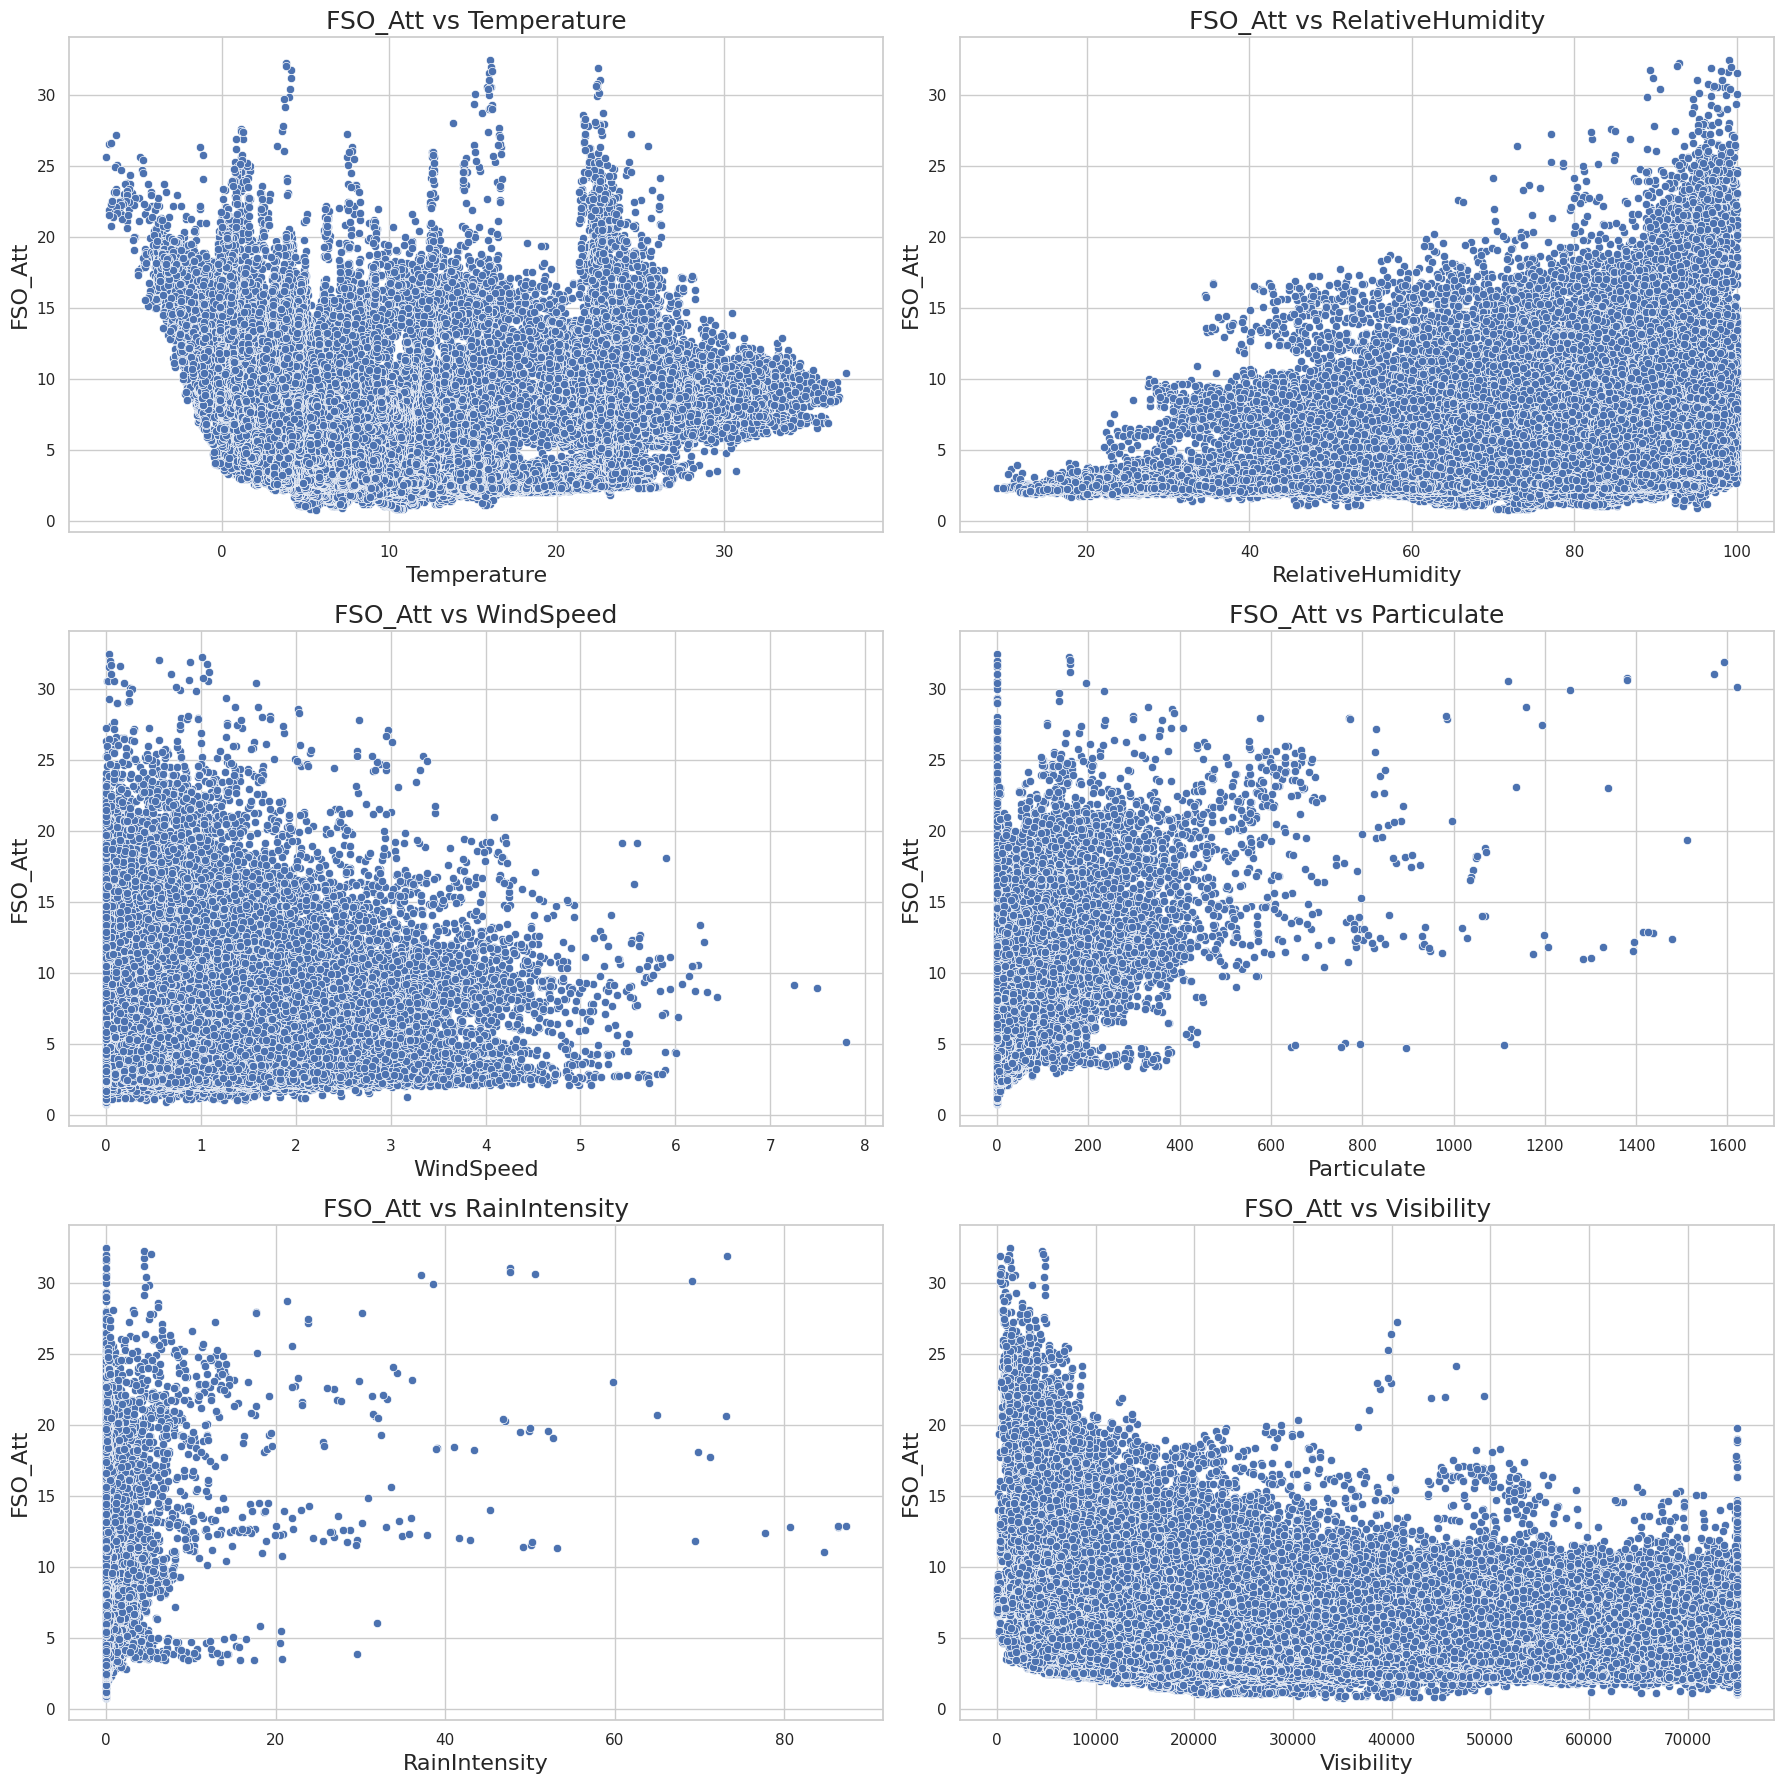

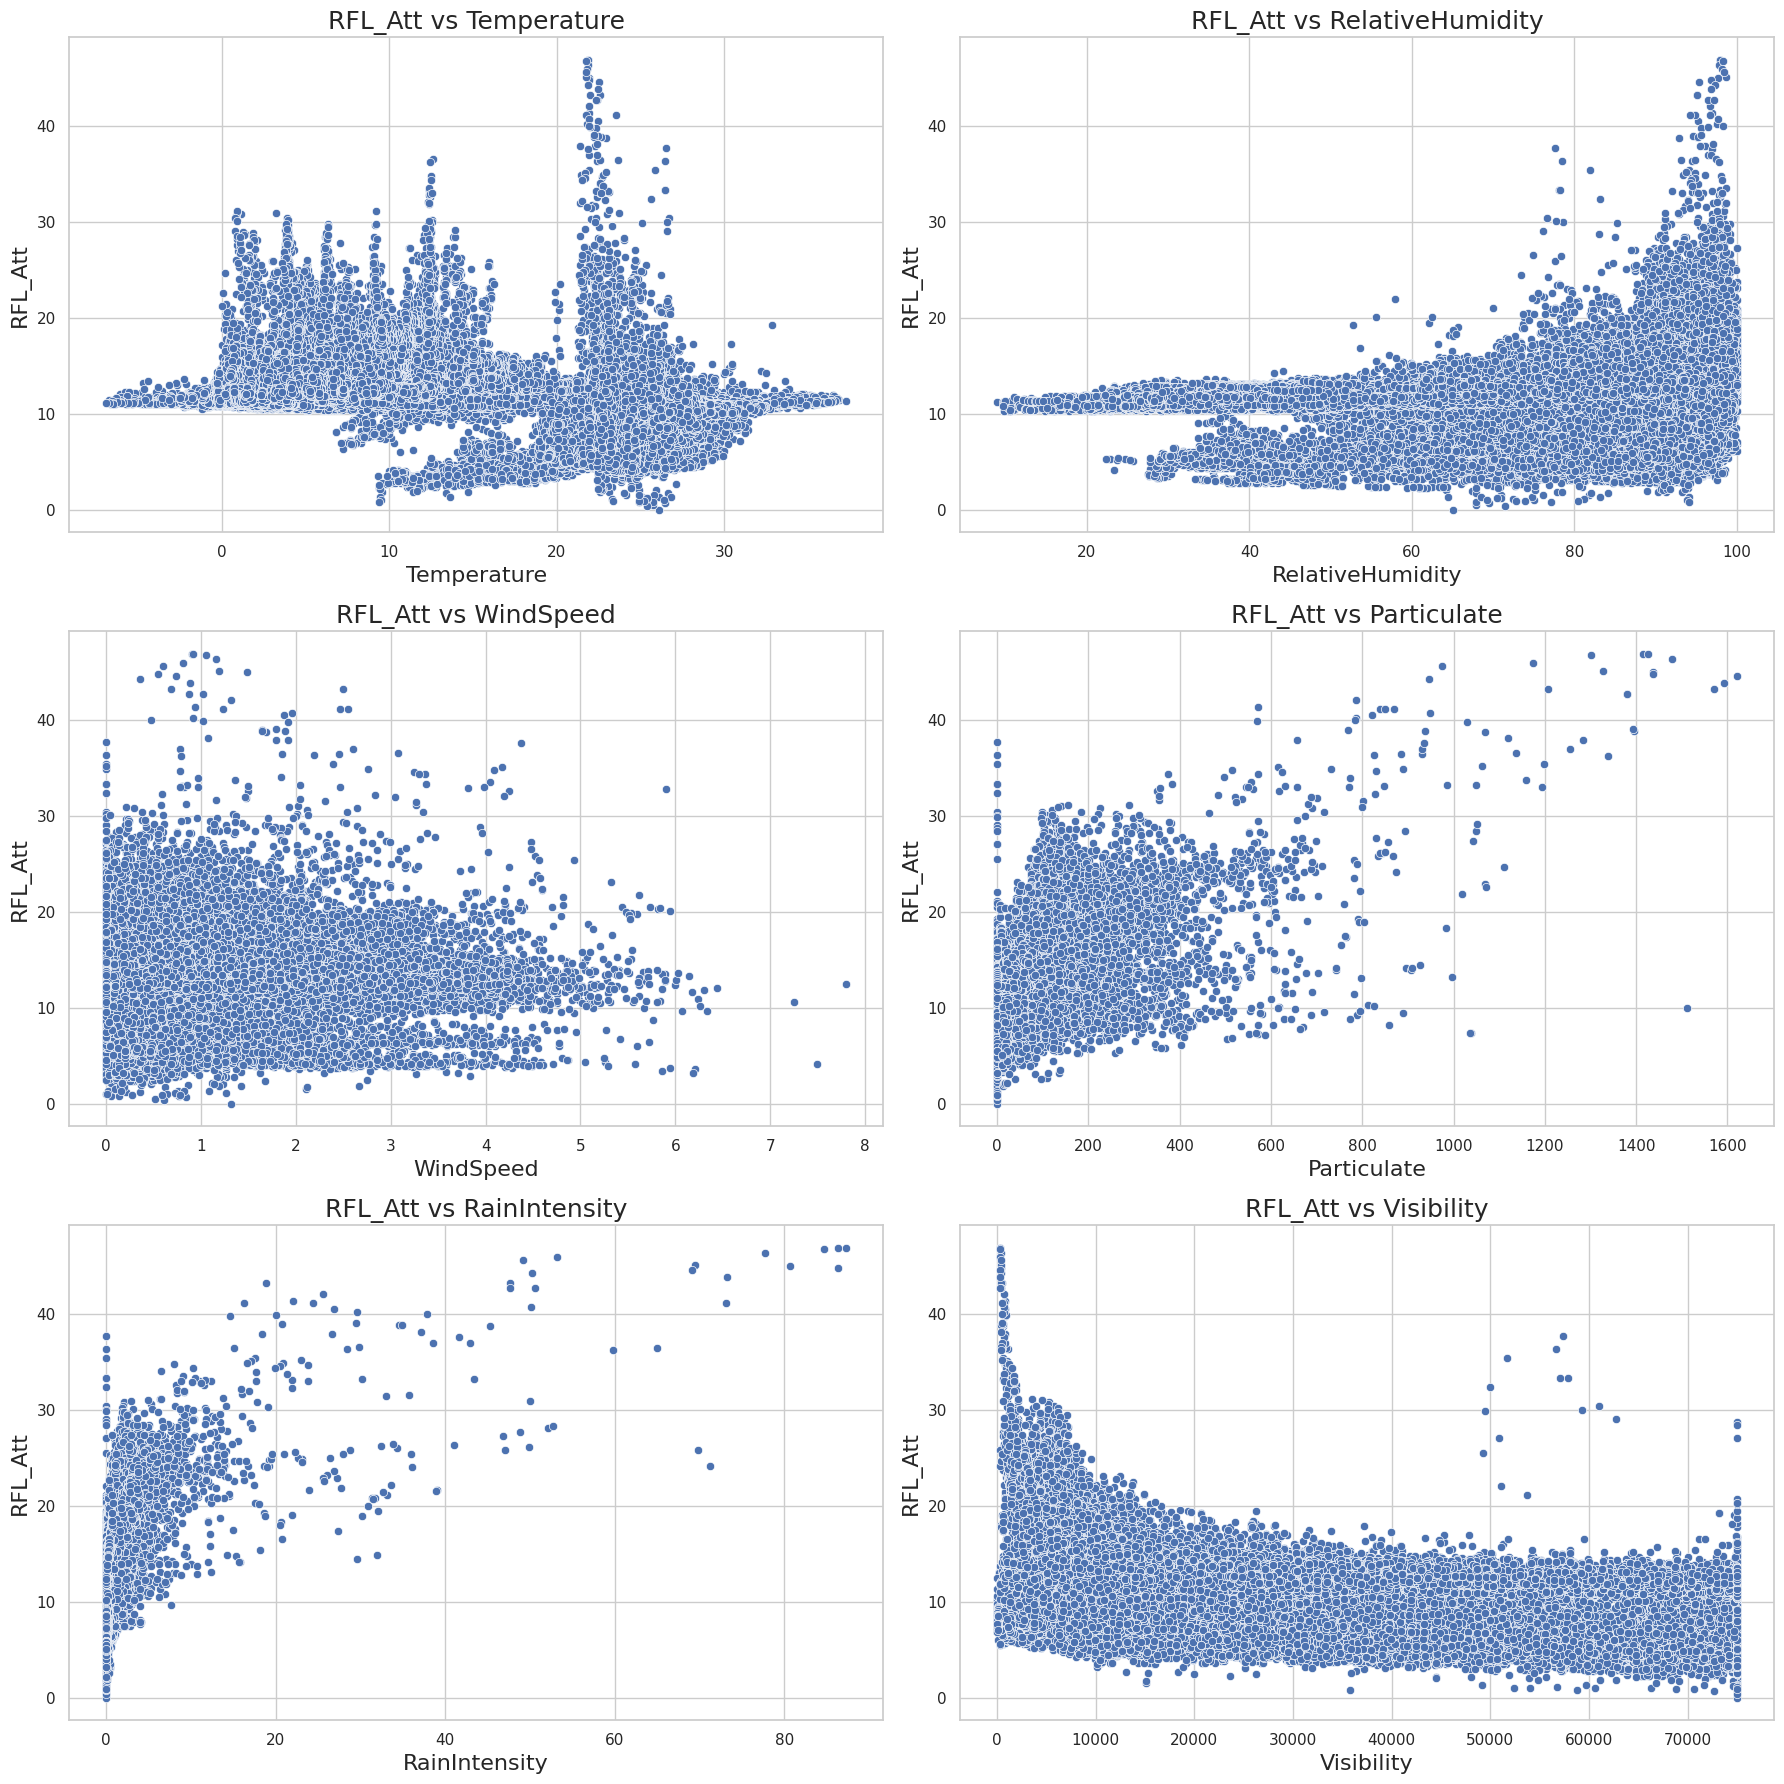

In [ ]:
target_vari_fso = 'FSO_Att'
target_vari_rfl = 'RFL_Att'
feats = ['Temperature', 'RelativeHumidity', 'WindSpeed', 'Particulate', 'RainIntensity', 'Visibility']

# sscatter plot FSO Att nnn RF Att
plt.figure(figsize=(18, 18))

for i, f in enumerate(feats):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(data=data, x=f, y=target_vari_fso)
    plt.title(f'{target_vari_fso} vs {feature}', fontsize=18)
    plt.xlabel(feature, fontsize=16)
    plt.ylabel(target_vari_fso, fontsize=16)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 18))

for i, f in enumerate(feats):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(data=data, x=f, y=target_vari_rfl)
    plt.title(f'{target_vari_rfl} vs {feature}', fontsize=18)
    plt.xlabel(feature, fontsize=16)
    plt.ylabel(target_vari_rfl, fontsize=16)

plt.tight_layout()
plt.show()


<ipython-input-18-6648eda8d0ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=variable, palette=col_SYNOP_palatte)
<ipython-input-18-6648eda8d0ce>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=variable, palette=time_palette)


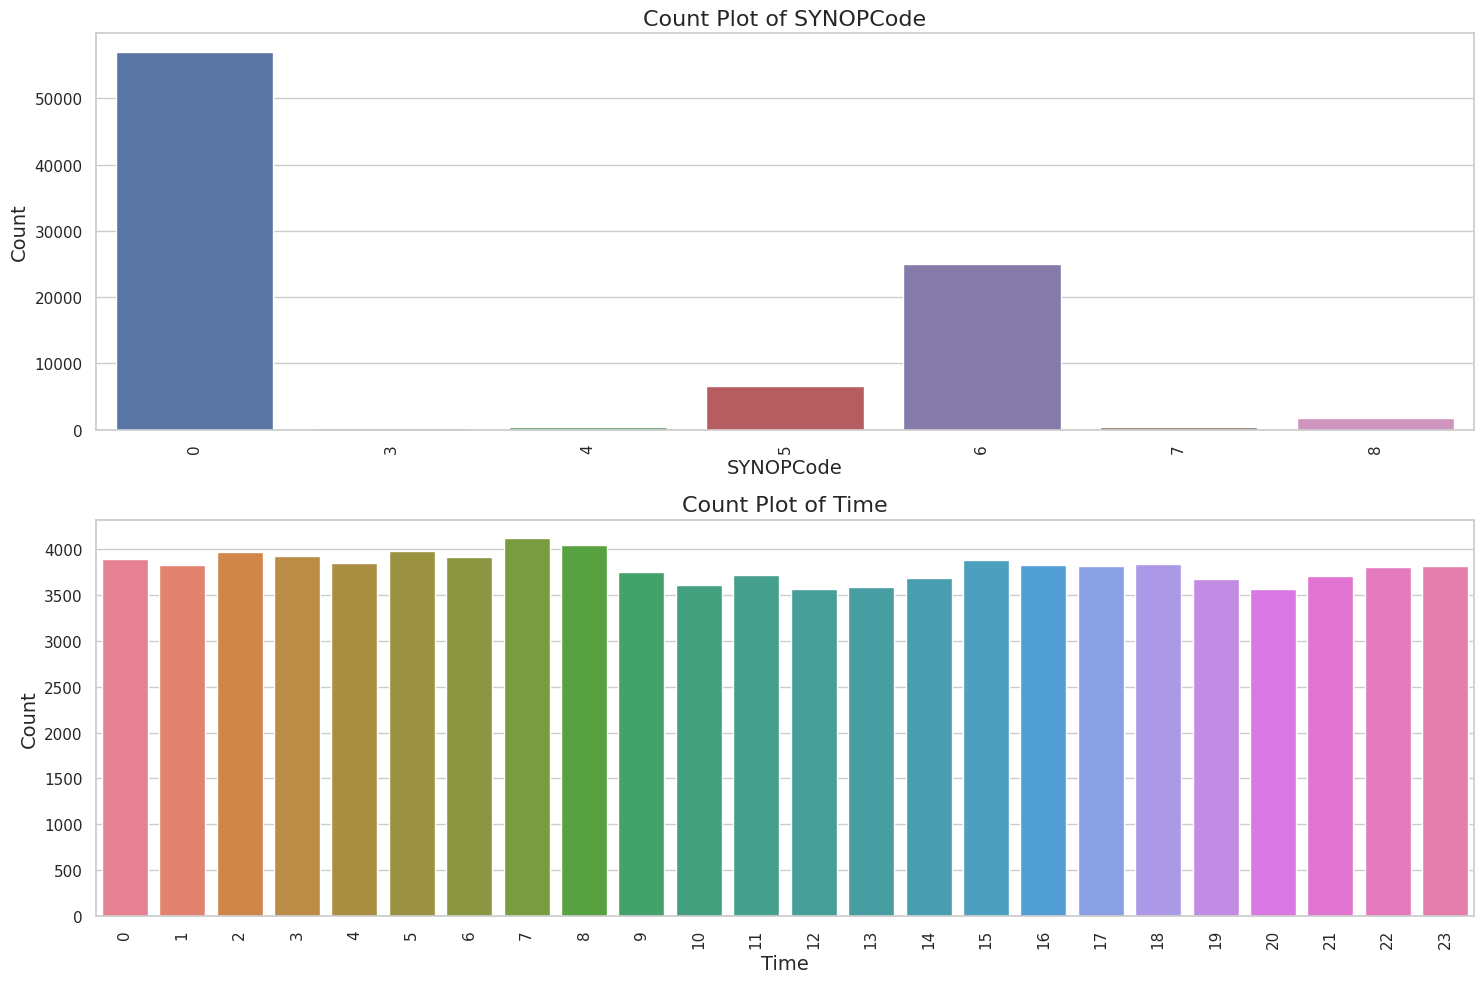

In [ ]:

categorical_vari = ['SYNOPCode', 'Time']

plt.figure(figsize=(15, 10))

col_SYNOP_palatte = sns.color_palette(["#4c72b0", "#dd8452", "#55a868", "#c44e52", "#8172b2", "#937860", "#da8bc3"])
time_palette = sns.color_palette("husl", len(data['Time'].unique()))

for i, vari in enumerate(categorical_vari):
    plt.subplot(2, 1, i + 1)
    if vari == 'SYNOPCode':
        sns.countplot(data=data, x=vari, palette=col_SYNOP_palatte)
    elif vari == 'Time':
        sns.countplot(data=data, x=vari, palette=time_palette)
    plt.title(f'Count Plot of {vari}', fontsize=16)
    plt.xlabel(vari, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


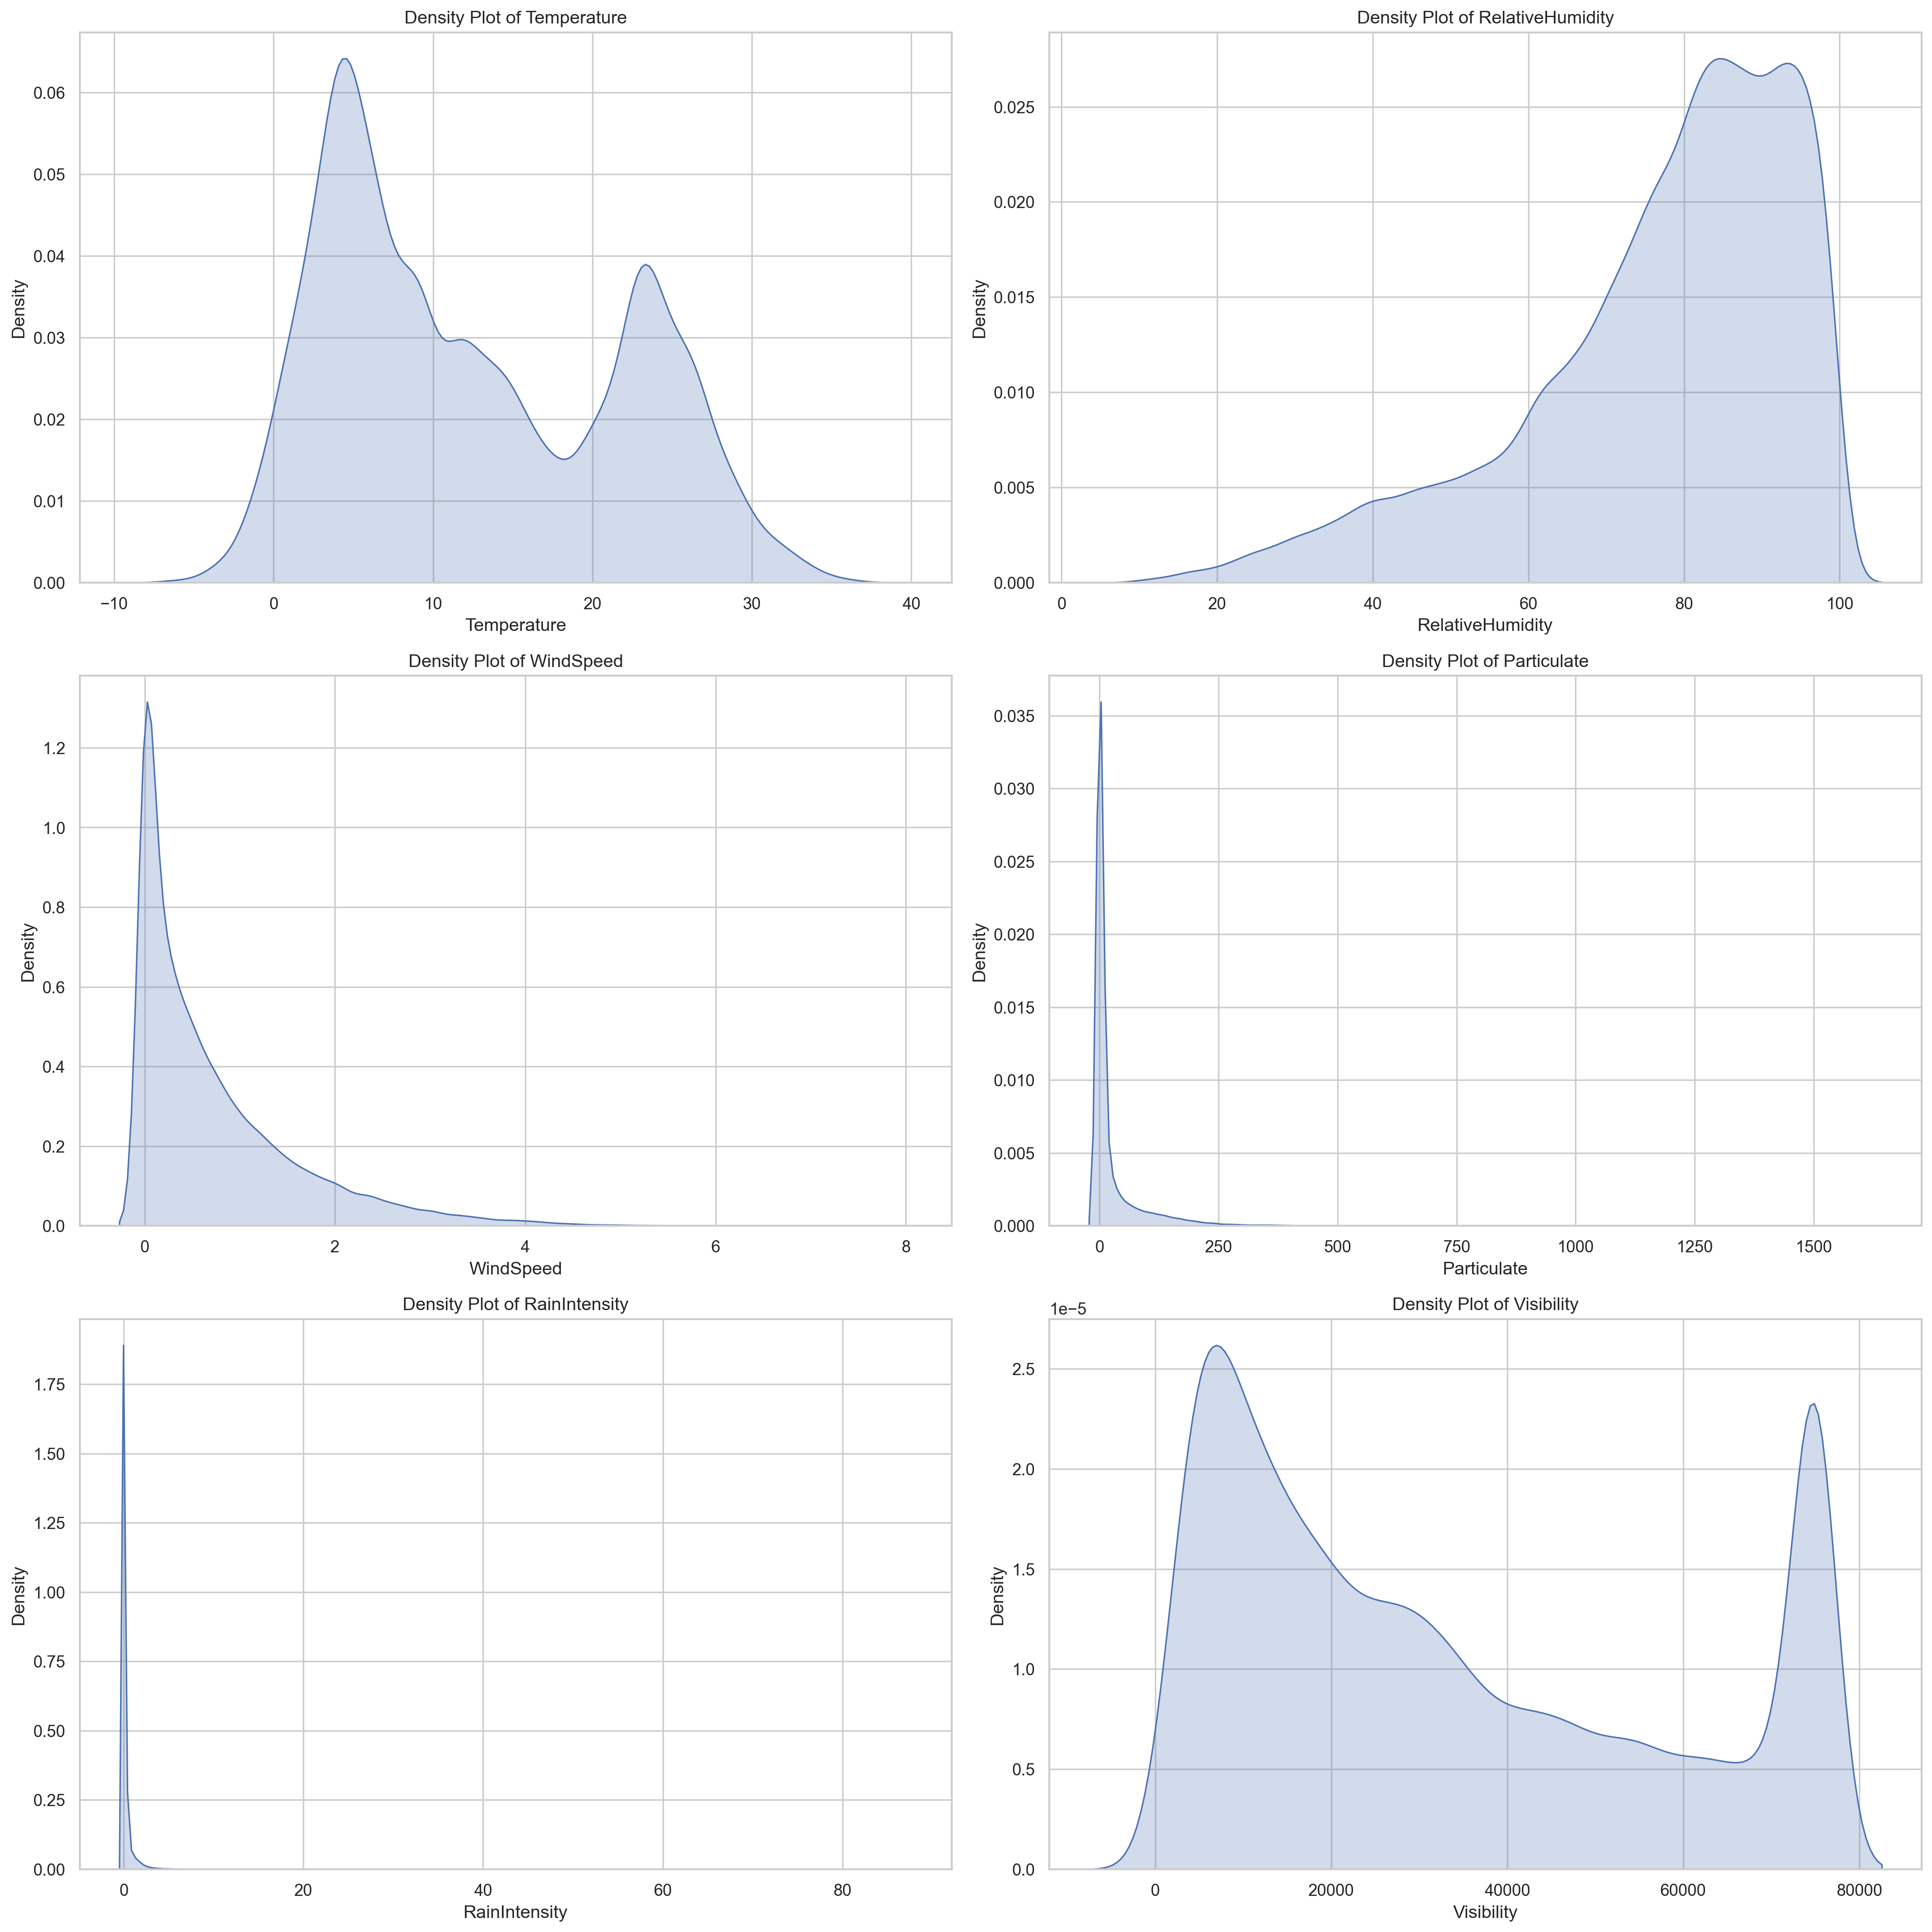

In [ ]:


feats = ['Temperature', 'RelativeHumidity', 'WindSpeed', 'Particulate', 'RainIntensity', 'Visibility']

plt.figure(figsize=(18, 18))

for i, f in enumerate(feats):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(data[f], shade=True)
    plt.title(f'Density Plot of {f}')
    plt.xlabel(f)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()
